In [2]:
        16
       /  \
     8    24
    / \   / \
   4  12 20 28
  / \ / \ / \ / \
 2  6 10 14 18 22 26 30
/ \ 
1  3


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [14]:
# Soru 1-B
class BST:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def ekle(self, value):
        if value < self.value:
            if self.left is None:
                self.left = BST(value)
            else:
                self.left.ekle(value)
        else:
            if self.right is None:
                self.right = BST(value)
            else:
                self.right.ekle(value)

#  oluştur ve düğümleri ekle
agac = BST(16)
dugumler = [8, 24, 4, 12, 20, 28, 2, 6, 10, 14, 18, 22, 26, 30, 1, 3]

for dugum in dugumler:
    agac.ekle(dugum)



In [16]:
yeni_dugumler = [30, 40, 50, 60]
for dugum in yeni_dugumler:
    agac.ekle(dugum)

In [11]:
# Soru 2-A
# Öncelikle düğümleri belirleyelim ve indeksleyelim
dugumler = ["A", "B", "C", "D", "E", "F"]

# Komşuluk matrisini oluşturmak için bir boş matris oluşturalım
komsuluk_matrisi = [[0 for _ in range(len(dugumler))] for _ in range(len(dugumler))]

# Bağlantıları ekleyelim
kenarlar = [("A", "B", 4), ("A", "C", 2), ("B", "C", 5), ("B", "D", 10), ("C", "D", 3), ("C", "E", 4), ("D", "F", 11), ("E", "D", 1), ("E", "F", 5)]

# Matrise bağlantıları işleyelim
for kenar in kenarlar:
    i = dugumler.index(kenar[0])
    j = dugumler.index(kenar[1])
    komsuluk_matrisi[i][j] = kenar[2]
    komsuluk_matrisi[j][i] = kenar[2]  # Bu satır grafiğin yönsüz olduğunu varsayar

# Matrisin yazdırılması
print("Komşuluk Matrisi:")
for satir in komsuluk_matrisi:
    print(satir)


Komşuluk Matrisi:
[0, 4, 2, 0, 0, 0]
[4, 0, 5, 10, 0, 0]
[2, 5, 0, 3, 4, 0]
[0, 10, 3, 0, 1, 11]
[0, 0, 4, 1, 0, 5]
[0, 0, 0, 11, 5, 0]


In [13]:
# Soru 2-B
# Düğümleri belirleyelim
dugumler = ["A", "B", "C", "D", "E", "F"]

# Komşuluk listesini oluşturmak için bir boş sözlük oluştur
komsuluk_listesi = {dugum: [] for dugum in dugumler}

# Bağlantıları ekleyelim
kenarlar = [("A", "B", 4), ("A", "C", 2), ("B", "C", 5), ("B", "D", 10), ("C", "D", 3), ("C", "E", 4), ("D", "F", 11), ("E", "D", 1), ("E", "F", 5)]

# Listeye bağlantıları işle
for kenar in kenarlar:
    komsuluk_listesi[kenar[0]].append((kenar[1], kenar[2]))
    komsuluk_listesi[kenar[1]].append((kenar[0], kenar[2]))  # Bu satır grafiğin yönsüz olduğunu varsayar

# Listeleri yazdır
print("Komşuluk Listesi:")
for dugum in komsuluk_listesi:
    print(f"{dugum}: {komsuluk_listesi[dugum]}")



Komşuluk Listesi:
A: [('B', 4), ('C', 2)]
B: [('A', 4), ('C', 5), ('D', 10)]
C: [('A', 2), ('B', 5), ('D', 3), ('E', 4)]
D: [('B', 10), ('C', 3), ('F', 11), ('E', 1)]
E: [('C', 4), ('D', 1), ('F', 5)]
F: [('D', 11), ('E', 5)]


In [7]:
# Soru 3-A

import heapq #Kütüphaneyi ekliyoruz

def dijstra(matris, baslangic):
    n = len(matris)
    mesafeler = [float('infinity')] * n #Tüm düğümler için başlangıçta sonsuz mesafeler
    mesafeler[baslangic] = 0 #Başlangıç düğümü için mesafeyi 0 olarak ayarlıyoruz.
    oncelik_kuyrugu = [(0, baslangic)] #Öncelik kuyruğunu başlatıyoruz. Başlangıç düğümünü ve mesafesini (0) içine ekliyoruz.
    onceki_dugumler = [None] * n
    
    while oncelik_kuyrugu: #Öncelik kuyruğu boş olana kadar döngüye devam ediyoruz.

        mevcut_mesafe, mevcut_dugum = heapq.heappop(oncelik_kuyrugu)
        
        if mevcut_mesafe > mesafeler[mevcut_dugum]:
            continue
        
        for komsu in range(n):
            if matris[mevcut_dugum][komsu] != 0:
                mesafe = mevcut_mesafe + matris[mevcut_dugum][komsu]
                
                if mesafe < mesafeler[komsu]:
                    mesafeler[komsu] = mesafe
                    onceki_dugumler[komsu] = mevcut_dugum
                    heapq.heappush(oncelik_kuyrugu, (mesafe, komsu))
    
    return mesafeler, onceki_dugumler

# Graf matrisini tanımlayalım
graf_matris = [
    # A  B  C  D  E  F
    [ 0, 4, 2, 0, 0, 0], # A
    [ 4, 0, 5,10, 0, 0], # B
    [ 2, 5, 0, 3, 4, 0], # C
    [ 0,10, 3, 0, 1,11], # D
    [ 0, 0, 4, 1, 0, 5], # E
    [ 0, 0, 0,11, 5, 0]  # F
]

# A düğümünden (index 0) F düğümüne (index 5) en kısa yolun mesafesi
mesafeler, onceki_dugumler = dijstra(graf_matris, 0)
print("A'dan F'ye en kısa mesafe:", mesafeler[5])

# En kısa yolu bulmak için önceki düğümleri takip edelim
def en_kisa_yol(onceki_dugumler, baslangic, hedef):
    yol = []
    mevcut_dugum = hedef
    while mevcut_dugum is not None:
        yol.insert(0, mevcut_dugum)
        mevcut_dugum = onceki_dugumler[mevcut_dugum]
    return yol

print("A'dan F'ye en kısa yol:", en_kisa_yol(onceki_dugumler, 0, 5))


A'dan F'ye en kısa mesafe: 11
A'dan F'ye en kısa yol: [0, 2, 4, 5]


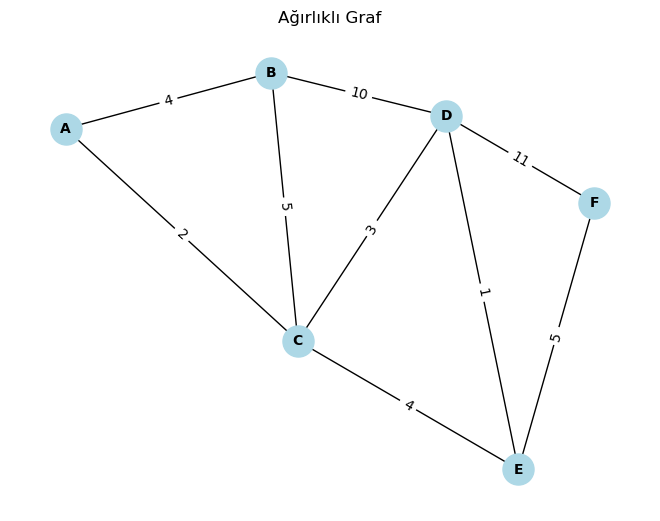

In [10]:
# Soru 3-C
import networkx as nx
import matplotlib.pyplot as plt

# Grafın kenarlarını ve ağırlıklarını tanımlıyor5uz
edges = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 5),
    ('B', 'D', 10),
    ('C', 'D', 3),
    ('C', 'E', 4),
    ('D', 'F', 11),
    ('E', 'D', 1),
    ('E', 'F', 5)
]

# NetworkX grafını oluşturuyoruz
G = nx.Graph()

# Kenarları grafımıza ekleyelim
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Düğümlerin pozisyonlarını belirleyelim
pos = nx.spring_layout(G)

# Grafı çizdirelim
plt.figure()
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Ağırlıklı Graf")
plt.show()
